<a href="https://colab.research.google.com/github/sipocz/_earthQuake/blob/main/_EarthQuake_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from sklearn.ensemble import IsolationForest
import numpy as np



In [66]:
#EarthQuake
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

#!pip install sweetviz
#import sweetviz as sw
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [67]:
df=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/features_a.csv")
df_clasters=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/train_labels.csv")
df_testvalues=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/test_a.csv")

In [68]:
numx=260601
Y=df_clasters[["damage_grade"]]
X=df
scaler=MinMaxScaler()
Xt=X[:numx]
Xt=scaler.fit_transform(Xt)
Xt=Xt[:numx]
Y=Y[["damage_grade"]]
Y=Y[:numx]
X_train, X_test, y_train, y_test = train_test_split(Xt, Y, random_state=32)

heads=df.columns
print(len(heads))
print(len(df_testvalues.columns))
for i in df_testvalues.columns:
    if i not in heads:
        df_testvalues.drop(columns=[i], inplace=True)

print(len(df_testvalues.columns))
print(len(X_train))

57
78
57
195450


In [69]:
clf = IsolationForest(n_estimators=3, warm_start=True, max_features=3)
clf.fit(X_train)  # fit 10 trees  
#clf.set_params()  # add 10 more trees  
#clf.fit(X)  # fit the added trees 

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=3, max_samples='auto', n_estimators=3, n_jobs=None,
                random_state=None, verbose=0, warm_start=True)

In [70]:
X_train_predict=clf.predict(X_train)
print(len(X_train))

195450


In [71]:
print(X_train_predict)
maxX=len(X_train_predict)
outlier=0
for i in X_train_predict:
    if i==-1:
        outlier+=1
print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")

[1 1 1 ... 1 1 1]
A összes (195450 darabból 23395 darab outlier van. Az  12.0 %.)


In [ ]:
print()

Automatically created module for IPython interactive environment


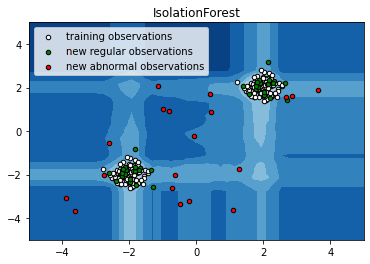

In [72]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [73]:
y_pred_test

array([ 1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1])